#

In [3]:
import pulp
import networkx as nx

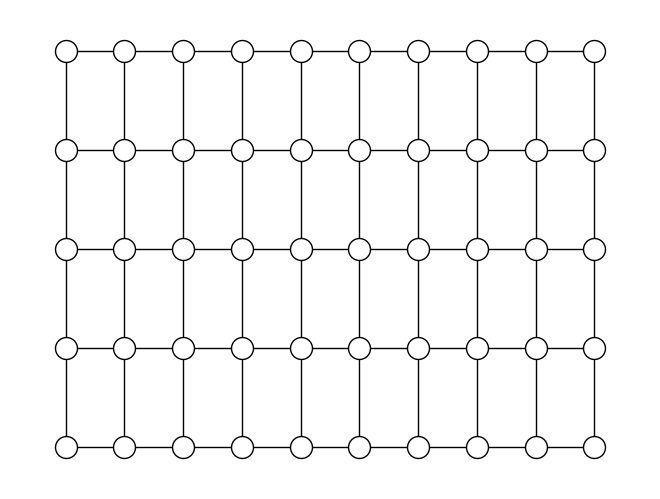

In [154]:
rows = 5
cols = 10
G = nx.grid_2d_graph(rows, cols)
for r in range(rows):
    for c in range(cols):
        G.nodes[(r, c)]["layer"] = c
nx.draw(G,pos=nx.multipartite_layout(G,subset_key="layer",align="vertical"),
        node_color="white",
        edgecolors="black",
        #with_labels=True,
        node_size=250)

In [180]:
pentominos = []
Ip,Lp,Pp,Yp = False,False,False,True
for node in G.nodes():
    if Ip:
        # I pentominos
        I = [(node[0]+i, node[1]) for i in range(5)]
        if all(n in G for n in I):
            P=G.subgraph(I)
            pentominos.append(P)
    if Lp:
        # L pentominos 1
        L1 = [(node[0]+i, node[1]) for i in range(4)]+[(node[0],node[1]+1)]
        if all(n in G for n in L1):
            P=G.subgraph(L1)
            pentominos.append(P)
        # L pentominos 2
        L2 = [(node[0]+i, node[1]) for i in range(4)]+[(node[0]+3,node[1]-1)]
        if all(n in G for n in L2):
            P=G.subgraph(L2)
            pentominos.append(P)
    if Pp:
        # P pentominos 1
        P1 = [(node[0]+i, node[1]) for i in range(3)]+[(node[0]+i,node[1]+1) for i in range(2)]
        if all(n in G for n in P1):
            P=G.subgraph(P1)
            pentominos.append(P)
        # P pentominos 2
        P2 = [(node[0]+i, node[1]) for i in range(1,3)]+[(node[0]+i,node[1]+1) for i in range(3)]
        if all(n in G for n in P2):
            P=G.subgraph(P2)
            pentominos.append(P)
    if Yp:
        # Y pentominos 1
        Y1 = [(node[0]+i, node[1]) for i in range(4)]+[(node[0]+i,node[1]+1) for i in range(2,3)]
        if all(n in G for n in Y1):
            P=G.subgraph(Y1)
            pentominos.append(P)
        # Y pentominos 2
        Y2 = [(node[0]+i, node[1]) for i in range(4)]+[(node[0]+i,node[1]-1) for i in range(1,2)]
        if all(n in G for n in Y2):
            P=G.subgraph(Y2)
            pentominos.append(P)
        # Y pentominos 3
        Y3 = [(node[0], node[1]+i) for i in range(4)]+[(node[0]-1,node[1]+i) for i in range(2,3)]
        if all(n in G for n in Y3):
            P=G.subgraph(Y3)
            pentominos.append(P)
        # Y pentominos 4
        Y4 = [(node[0], node[1]+i) for i in range(4)]+[(node[0]+1,node[1]+i) for i in range(1,2)]
        if all(n in G for n in Y4):
            P=G.subgraph(Y4)
            pentominos.append(P)
    
pentominos_dict = dict(zip([i for i in range(len(pentominos))],pentominos))

In [181]:
# create problem
prob = pulp.LpProblem("pentomino", pulp.LpMinimize)

# x[p] = 1 pentamino p is used
x = pulp.LpVariable.dicts("x",pentominos_dict,cat=pulp.LpBinary)

# dummy objective
prob+= 0

# each node shold be covered exactly once
for (r,c) in G.nodes():
    prob+= pulp.lpSum(x[p] for p in pentominos_dict if (r,c) in pentominos_dict[p].nodes()) == 1

In [182]:
prob.solve()

1

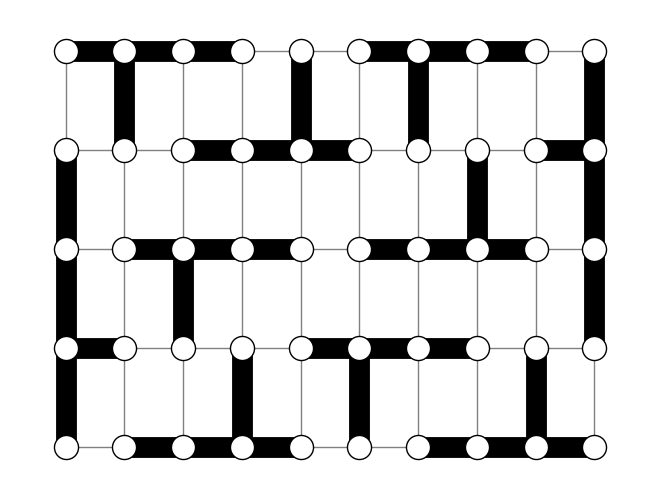

In [184]:
pos = {(x, y): (y, -x) for x, y in G.nodes()} 
nx.draw(G, pos, node_size=10, edge_color='grey')
for p in x:
    if pulp.value(x[p])>0.9:
        P = pentominos_dict[p]
        nx.draw(P, pos, 
                node_color="white",
                edgecolors="black", 
                width=15)